In [22]:
from pathlib import Path
import pandas as pd
from pandas import DataFrame as df
base_dir = Path('../robot-or-brain-data/robot-or-brain-data/images_by_class')
split = 'validation'
validation_dir = base_dir / split

classes = [p.name for p in validation_dir.iterdir()]

,0
0,Acting or Performing machine
1,Collaborative or Interactive AI
2,Complex AI
3,Learning or recognition machine
4,Mysterious AI
5,None of the above
6,Superior human
7,Thinking machine


<AxesSubplot:>

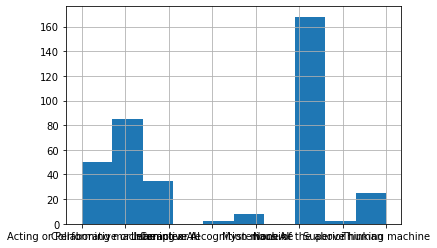

In [51]:

[[[f, cls] for f in (validation_dir / cls).iterdir()] for cls in classes]
data_lists = [[f, cls] for cls in classes for f in (validation_dir / cls).iterdir()]
d = df({'paths':[path for path, _ in data_lists], 'y':[cls for _, cls in data_lists]})

d['y'].hist()

In [17]:
d = validation_dir / (classes[3])
[f for f in d.iterdir()]



[WindowsPath('../robot-or-brain-data/robot-or-brain-data/images_by_class/validation/Learning/recognition machine')]